# Unsupervised learning

Unsupervised learning is a method used to enable machines to classify objects without providing the machines any prior information about the objects. The main idea behind unsupervised learning is to expose the machines to large volumes of varied data and allow it to learn and infer from the data. However, the machines must first be programmed to learn from data.

## 1. Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. The aim is to segregate groups with similar traits and assign them into clusters.

### 1.1. Hierarchical clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.  
This clustering technique is divided into two types:  
1.Agglomerative  
2.Divisive

#### 1.1.1. Agglomerative Hierarchical clustering

Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed. 
The basic algorithm of Agglomerative is straight forward.  
•Compute the proximity matrix  
•Let each data point be a cluster  
•Repeat: Merge the two closest clusters and update the proximity matrix  
•Until only a single cluster remains

#### 1.1.2. Divisive Hierarchical clustering

Divisive Hierarchical clustering Technique: Divisive Hierarchical clustering is exactly the opposite of the Agglomerative Hierarchical clustering. In Divisive Hierarchical clustering, we consider all the data points as a single cluster and in each iteration, we separate the data points from the cluster which are not similar. Each data point which is separated is considered as an individual cluster. In the end, we’ll be left with n clusters.

Calculating the similarity between two clusters is important to merge or divide the clusters. There are different ways to find distance between the clusters. Following are some of the options to measure distance between two clusters:  
1.Measure the distance between the closest points of two clusters.  
2.Measure the distance between the farthest points of two clusters.  
3.Measure the distance between the centroids of two clusters.  
4.Measure the distance between all possible combination of points between the two clusters and take the mean.  


The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

Once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points. Let's see how it's actually done.

Suppose we have a collection of data points represented by a numpy array as follows:


In [46]:
import numpy as np
X = np.array([[3,5],
    [10,18],
    [14,12],
    [24,8],
    [30,30],
    [85,77],
    [74,83],
    [62,78],
    [70,58],
    [80,90],])

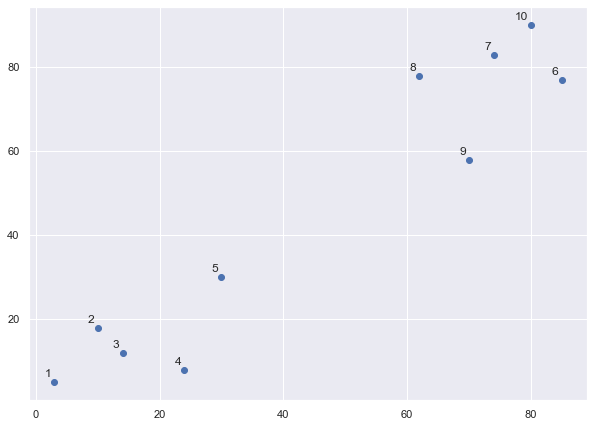

In [47]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()


It can be seen from the naked eye that the data points form two clusters: first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

However, in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. This is why clustering algorithms have been developed.

Let's draw the dendrograms for our data points. We will use the scipy library for that purpose.


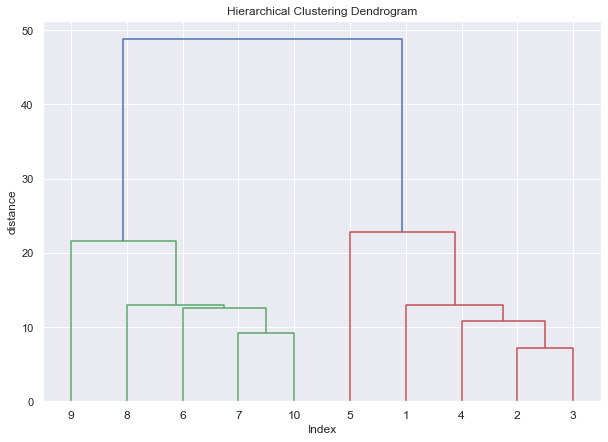

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('distance')
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


##### Dendrogram Truncation 

We can truncate dendrogram according to the application of data, we can find last p clusters or can trucate it at any specific distance. Let's draw dendrogram of last 5 clusters of our data points.

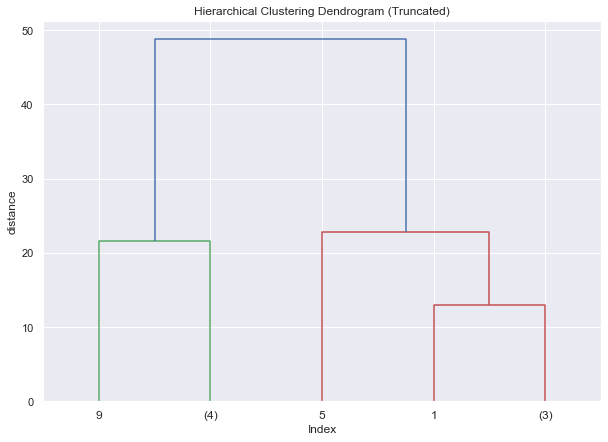

In [49]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Index')
plt.ylabel('distance')
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            truncate_mode='lastp',  # show only the last p merged clusters
            p=5,  # show only the last p merged clusters
            show_leaf_counts=True)
plt.show()

Above plot shows us last 5 clusters of our data points.

Now let's implement hierarchical clustering using Python's Scikit-Learn library.

[0 0 0 0 0 1 1 1 1 1]


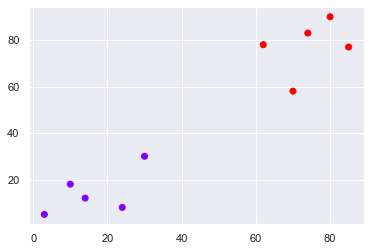

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')


We can see points in two clusters where the first five points clustered together and the last five points clustered together.

Advantages of Hierarchical clustering Technique:  
1.No apriori information about the number of clusters required.  
2.Easy to implement and gives best result in some cases.

Limitations of Hierarchical clustering Technique:  
1.There is no mathematical objective for Hierarchical clustering.  
2.All the approaches to calculate the similarity between clusters has its own disadvantages.  
3.High space and time complexity for Hierarchical clustering. Hence this clustering algorithm cannot be used when we have huge data.

### 1.2. k-Means

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:  
•The "cluster center" is the arithmetic mean of all the points belonging to the cluster.  
•Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. Let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

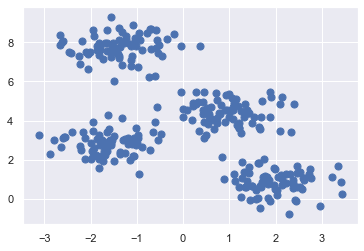

In [28]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

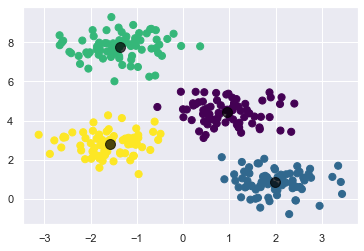

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7);

How this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly, but such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization.

#### k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:  
1.Guess some cluster centers  
2.Repeat until converged
    
    1.E-Step: assign points to the nearest cluster center
    2.M-Step: set the cluster centers to the mean 


Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

The k-Means algorithm is simple enough that we can write it in a few lines of code. The following is a very basic implementation:

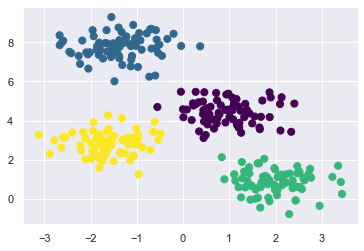

In [31]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');



There are a few issues to be aware of when using the expectation–maximization algorithm.

First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution. For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:


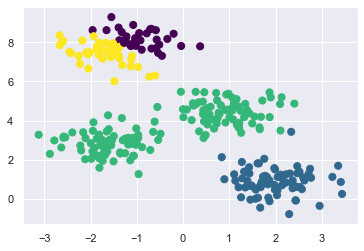

In [32]:
centers, labels = find_clusters(X, 4, rseed=3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the n_init parameter, which defaults to 10).

Another common challenge with k-means is that we must tell it how many clusters we expect: it cannot learn the number of clusters from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters:

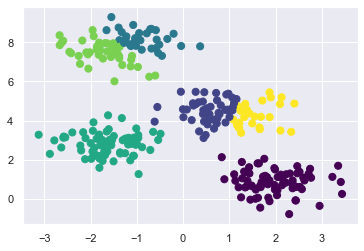

In [33]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

An important observation for k-means is that these cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters. So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled:

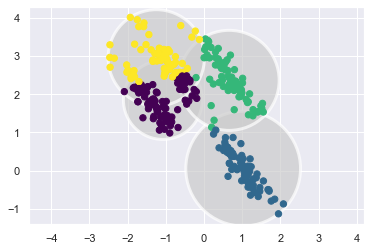

In [34]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.7, zorder=1))

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] 
        
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:


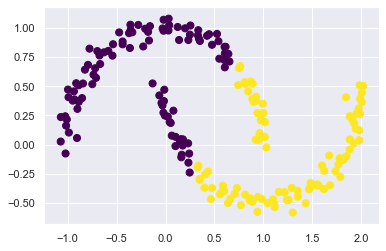

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Advantages:  
1.Fast, robust and easier to understand.  
2.Relatively efficient: O(tknd), where n is number of objects, k is number of number of clusters, d is number of dimension of each object, and t is number of iterations. Normally, k, t, d << n.  
3.Gives best result when data set are distinct or well separated from each other.

Disadvantages:  
1.The learning algorithm requires apriori specification of the number of  cluster centers.   
2.If there are two highly overlapping data then k-means will not be able to resolve.  
3.The learning algorithm is not invariant to non-linear transformations i.e. with different representation of data we get
different results (data represented in form of cartesian co-ordinates and polar co-ordinates will give different results).  
4.Euclidean distance measures can unequally weight underlying factors.   
5.The learning algorithm provides the local optima of the squared error function.   
6.Randomly choosing of the cluster center cannot lead us to the fruitful result. Pl. refer Fig.  
7.Applicable only when mean is defined i.e. fails for categorical data.  
8.Unable to handle noisy data and outliers.   
9.Algorithm fails for non-linear data set.

WE might imagine addressing these weaknesses by generalizing the k-means model: for example, we could measure uncertainty in cluster assignment by comparing the distances of each point to all cluster centers, rather than focusing on just the closest. We might also imagine allowing the cluster boundaries to be ellipses rather than circles, so as to account for non-circular clusters. It turns out these are two essential components of a different type of clustering model, Gaussian mixture models.

### 1.3. Gaussian Mixture Models

Gaussian Mixture models are used to find clusters in a dataset from which we know (or assume to know) the number of clusters enclosed in this dataset, but we do not know where these clusters are as well as how they are shaped. Finding these clusters is the task of GMM and since we don't have any information instead of the number of clusters, the GMM is an unsupervised approach. To accomplish that, we try to fit a mixture of gaussians to our dataset. That is, we try to find a number of gaussian distributions which can be used to describe the shape of our dataset. A critical point for the understanding is that these gaussian shaped clusters must not be circular shaped as for instance in the KNN approach but can have all shapes a multivariate Gaussian distribution can take. That is, a circle can only change in its diameter whilst a GMM model can (because of its covariance matrix) model all ellipsoid shapes as well.

In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

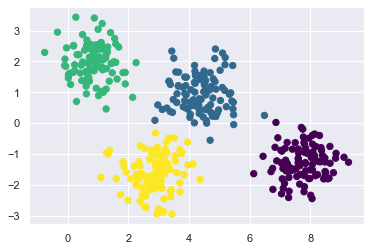

In [36]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] 
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

In [37]:
probs = gmm.predict_proba(X)
print(probs[:10].round(3))

[[0.469 0.531 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.986 0.    0.014]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction; looking at the following figure, we can see that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment:

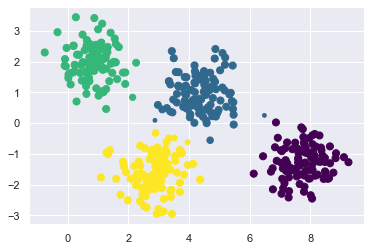

In [38]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

Under the hood, a Gaussian mixture model is very similar to k-means: it uses an expectation–maximization approach which qualitatively does the following:  
1.Choose starting guesses for the location and shape  
2.Repeat until converged:

    1.E-step: for each point, find weights encoding the probability of membership in each cluster
    2.M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights


The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model. Just as in the k-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

Let's create a function that will help us visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:


In [39]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


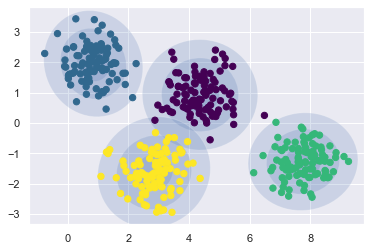

In [40]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)


Similarly, we can use the GMM approach to fit our stretched dataset; allowing for a full covariance the model will fit even very oblong, stretched-out clusters:

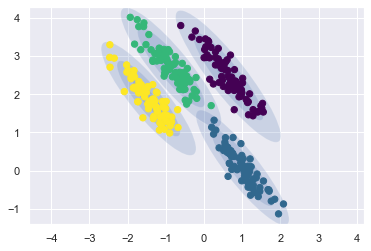

In [41]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)


This makes clear that GMM addresses the two main practical issues with k-means encountered before.

#### Choosing the covariance type

If we look at the details of the preceding fits, we will see that the covariance_type option was set differently within each. This hyperparameter controls the degrees of freedom in the shape of each cluster; it is essential to set this carefully for any given problem. The default is covariance_type="diag", which means that the size of the cluster along each dimension can be set independently, with the resulting ellipse constrained to align with the axes. A slightly simpler and faster model is covariance_type="spherical", which constrains the shape of the cluster such that all dimensions are equal. The resulting clustering will have similar characteristics to that of k-means, though it is not entirely equivalent. A more complicated and computationally expensive model (especially as the number of dimensions grows) is to use covariance_type="full", which allows each cluster to be modeled as an ellipse with arbitrary orientation.

Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

As an example, consider some data generated from Scikit-Learn's make_moons function.
If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

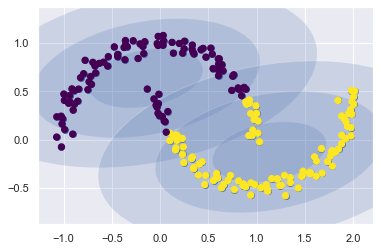

In [42]:
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)


But if we instead use many more components and ignore the cluster labels, we find a fit that is much closer to the input data:

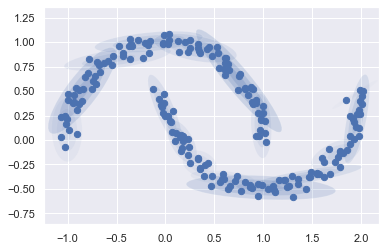

In [43]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)


Advantage:  
1.Gives extremely useful result for the real world data set.

Disadvantage:  
1.Algorithm is highly complex in nature.

### Questionnaire :

What are different types of hierarchical clustering algorithms?    
What is difference between K-means and Gaussian mixture models?  
What is Agglomerative Hierarchical clustering?  
What are clustering techniques in data mining?  
What is the overall complexity of the agglomerative hierarchical clustering?  